In [6]:
import nltk, re

# nltk.download()

sample_text_data = nltk.corpus.gutenberg.raw('bible-kjv.txt')
sample_text = re.sub('\n\n', '<enter>', sample_text_data)
sample_text = re.sub('\n', ' ', sample_text)
sample_text = re.sub('<enter>', '\n', sample_text)

print(sample_text[:1000])

[The King James Bible]
The Old Testament of the King James Bible
The First Book of Moses:  Called Genesis
 1:1 In the beginning God created the heaven and the earth.
1:2 And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.
1:3 And God said, Let there be light: and there was light.
1:4 And God saw the light, that it was good: and God divided the light from the darkness.
1:5 And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.
1:6 And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.
1:7 And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.
1:8 And God called the firmament Heaven. And the evening and the morning were the second day.
1:9 And God said, Let the waters under the heaven be gathe

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, regexp_tokenize

sentence_list = sent_tokenize(sample_text)
print(sentence_list[:10], end='\n\n')

pattern = '[\w]+'
print(word_tokenize(sentence_list[0]), end='\n\n')
print(RegexpTokenizer(pattern).tokenize(sentence_list[0]), end='\n\n')

tokens_data = regexp_tokenize(sample_text, pattern)
print(tokens_data[:100])

['[The King James Bible]\nThe Old Testament of the King James Bible\nThe First Book of Moses:  Called Genesis\n 1:1 In the beginning God created the heaven and the earth.', '1:2 And the earth was without form, and void; and darkness was upon the face of the deep.', 'And the Spirit of God moved upon the face of the waters.', '1:3 And God said, Let there be light: and there was light.', '1:4 And God saw the light, that it was good: and God divided the light from the darkness.', '1:5 And God called the light Day, and the darkness he called Night.', 'And the evening and the morning were the first day.', '1:6 And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.', '1:7 And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.', '1:8 And God called the firmament Heaven.']

['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of',

In [41]:
nltk_en = nltk.Text(tokens_data)

print(len(nltk_en.tokens))
print(len(set(nltk_en.tokens)))
nltk_en.vocab()

854046
13746


FreqDist({'the': 62103, 'and': 38847, 'of': 34480, 'to': 13396, 'And': 12846, 'that': 12576, 'in': 12331, 'shall': 9760, 'he': 9665, 'unto': 8940, ...})

In [22]:
en_stopword = nltk.corpus.stopwords.words('english')

print(word_tokenize(sentence_list[0]), end='\n\n')
print([xx for xx in RegexpTokenizer(pattern).tokenize(sentence_list[0]) if xx not in en_stopword])

['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', ':', 'Called', 'Genesis', '1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'Moses', 'Called', 'Genesis', '1', '1', 'In', 'beginning', 'God', 'created', 'heaven', 'earth']


In [16]:
from nltk.tag import pos_tag

print(pos_tag(RegexpTokenizer('[\w]+').tokenize(sentence_list[0])), end='\n\n')

print(nltk.help.upenn_tagset('NNS'))

[('The', 'DT'), ('King', 'NNP'), ('James', 'NNP'), ('Bible', 'NNP'), ('The', 'DT'), ('Old', 'NNP'), ('Testament', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('King', 'NNP'), ('James', 'NNP'), ('Bible', 'NNP'), ('The', 'DT'), ('First', 'NNP'), ('Book', 'NNP'), ('of', 'IN'), ('Moses', 'NNP'), ('Called', 'NNP'), ('Genesis', 'NNP'), ('1', 'CD'), ('1', 'CD'), ('In', 'IN'), ('the', 'DT'), ('beginning', 'NN'), ('God', 'NNP'), ('created', 'VBD'), ('the', 'DT'), ('heaven', 'NN'), ('and', 'CC'), ('the', 'DT'), ('earth', 'NN')]

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
None


In [17]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

sample_stem_words = ['fly', 'flies', 'flying', 'flew', 'flown']
print([PorterStemmer().stem(xx) for xx in sample_stem_words])
print([LancasterStemmer().stem(xx) for xx in sample_stem_words])
print([WordNetLemmatizer().lemmatize(xx, pos='v') for xx in sample_stem_words])

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


['fly', 'fly', 'fly', 'fly', 'fly']


In [24]:
token_freq = nltk.FreqDist([xx for xx in RegexpTokenizer('[\w]+').tokenize(sample_text) if xx not in en_stopword])

print(token_freq.N())
print(token_freq['God'])
print(token_freq.freq('God'))

print(token_freq.most_common(6))

476079
4115
0.008643523448839374
[('And', 12846), ('shall', 9760), ('unto', 8940), ('I', 8854), ('LORD', 6651), ('thou', 4890)]


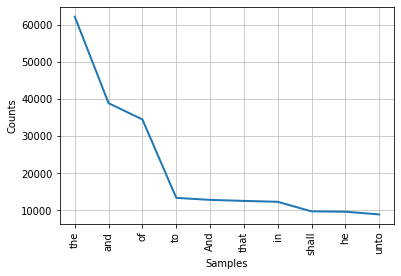

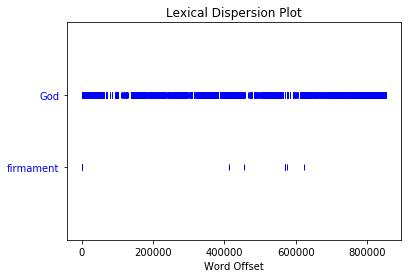

In [27]:
import matplotlib.pyplot as plt

nltk_text = nltk.Text(RegexpTokenizer('[\w]+').tokenize(sample_text))
nltk_text.plot(10)
plt.show()

nltk_text.dispersion_plot(['God', 'firmament'])

In [28]:
print(nltk_text.concordance('God'))

Displaying 25 of 4472 matches:
s Called Genesis 1 1 In the beginning God created the heaven and the earth 1 2 
he face of the deep And the Spirit of God moved upon the face of the waters 1 3
d upon the face of the waters 1 3 And God said Let there be light and there was
 be light and there was light 1 4 And God saw the light that it was good and Go
od saw the light that it was good and God divided the light from the darkness 1
d the light from the darkness 1 5 And God called the light Day and the darkness
he morning were the first day 1 6 And God said Let there be a firmament in the 
de the waters from the waters 1 7 And God made the firmament and divided the wa
e the firmament and it was so 1 8 And God called the firmament Heaven And the e
e morning were the second day 1 9 And God said Let the waters under the heaven 
ry land appear and it was so 1 10 And God called the dry land Earth and the gat
ther of the waters called he Seas and God saw that it was good 1 11 And God sai
and God s

In [29]:
print(nltk_text.similar('God'))

them him it he israel thee me you and man david judah us i people
father jerusalem men that lord
None


In [30]:
print(nltk_text.common_contexts(['God', 'firmament']))

the_of a_in the_that the_and
None
